# Homework #5. Exploratory Data Analysis
Author: Oleksandra Zolotarevych Total time spent on h/w (in minutes):840 `

In [350]:
import pandas as pd
import telethon
import seaborn as sns
import ast
import matplotlib.pyplot as plt
import numpy
import nltk
import re
import collections
import itertools

Defining variables

In [351]:
DIALOGS_MERGED_DATA_PATH = "../data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "../data/merged_data/dialogs_users_all.csv"

In [352]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

Export to exel file peoples names

In [353]:
df.head(10)

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
0,884,2022-12-14 21:36:42+00:00,NaN,PeerChannel(channel_id=1166174338),NaN,NaN,text,NaN,-1001166174338
1,883,2022-12-14 21:36:29+00:00,NaN,PeerChannel(channel_id=1166174338),NaN,Сатира та гумор в європейських літературах\n\n...,text,NaN,-1001166174338
2,880,2022-10-29 13:50:57+00:00,NaN,PeerChannel(channel_id=1166174338),NaN,NaN,text,NaN,-1001166174338
3,879,2022-10-29 13:50:55+00:00,NaN,PeerChannel(channel_id=1166174338),NaN,"Re-thinking Ukrainian Donbas in finction, memo...",text,NaN,-1001166174338
4,878,2022-10-12 10:31:47+00:00,NaN,PeerChannel(channel_id=1166174338),NaN,NaN,text,NaN,-1001166174338
5,877,2022-10-12 10:31:45+00:00,NaN,PeerChannel(channel_id=1166174338),NaN,Правові системи сучасності\n\n2022\nШмарьова Т...,text,NaN,-1001166174338
6,876,2022-10-04 08:29:03+00:00,NaN,PeerChannel(channel_id=1166174338),NaN,NaN,text,NaN,-1001166174338
7,875,2022-10-04 08:29:00+00:00,NaN,PeerChannel(channel_id=1166174338),NaN,Аналіз зовнішньої політики\n\n2022\nЗарембо Ка...,text,NaN,-1001166174338
8,874,2022-10-04 08:28:59+00:00,NaN,PeerChannel(channel_id=1166174338),NaN,NaN,text,NaN,-1001166174338
9,873,2022-10-04 08:28:57+00:00,NaN,PeerChannel(channel_id=1166174338),NaN,Місцевий розвиток та урбаністика\n\n2022\nБерд...,text,NaN,-1001166174338


In [354]:
df.shape

(6453, 9)

## Data Onboarding

In [355]:
telegram_id = "PeerUser(user_id=310776127)"

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6453 entries, 0 to 6452
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6453 non-null   int64  
 1   date       6453 non-null   object 
 2   from_id    5555 non-null   object 
 3   to_id      6453 non-null   object 
 4   fwd_from   201 non-null    object 
 5   message    5279 non-null   object 
 6   type       6453 non-null   object 
 7   duration   79 non-null     float64
 8   dialog_id  6453 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 453.9+ KB


In [357]:
df_copy = df.copy()
alltextS = df.copy()
df_copy['normdate'] = pd.to_datetime(df_copy['date']).dt.date

In [358]:
min(df["date"]),max(df["date"])

('2018-10-17 14:37:03+00:00', '2022-12-16 07:30:50+00:00')

In [359]:
df = df.loc[df["from_id"] != 'NaN']
df.shape
df

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
0,884,2022-12-14 21:36:42+00:00,NaN,PeerChannel(channel_id=1166174338),NaN,NaN,text,NaN,-1001166174338
1,883,2022-12-14 21:36:29+00:00,NaN,PeerChannel(channel_id=1166174338),NaN,Сатира та гумор в європейських літературах\n\n...,text,NaN,-1001166174338
2,880,2022-10-29 13:50:57+00:00,NaN,PeerChannel(channel_id=1166174338),NaN,NaN,text,NaN,-1001166174338
3,879,2022-10-29 13:50:55+00:00,NaN,PeerChannel(channel_id=1166174338),NaN,"Re-thinking Ukrainian Donbas in finction, memo...",text,NaN,-1001166174338
4,878,2022-10-12 10:31:47+00:00,NaN,PeerChannel(channel_id=1166174338),NaN,NaN,text,NaN,-1001166174338
...,...,...,...,...,...,...,...,...,...
6448,309439,2021-10-21 20:06:49+00:00,PeerUser(user_id=334944894),PeerChat(chat_id=723344273),NaN,🙄,sticker,NaN,-723344273
6449,309438,2021-10-21 20:06:37+00:00,PeerUser(user_id=354812146),PeerChat(chat_id=723344273),NaN,NaN,text,NaN,-723344273
6450,309437,2021-10-21 20:06:31+00:00,PeerUser(user_id=354812146),PeerChat(chat_id=723344273),NaN,Вы экзамен посмотрели?,text,NaN,-723344273
6451,309436,2021-10-21 20:06:30+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😡,sticker,NaN,-723344273


In [360]:
mytexts_df = df.loc[df["from_id"] == telegram_id]
mYtexts = mytexts_df.copy()
mytexts_df

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
826,334014,2022-05-14 23:14:48+00:00,PeerUser(user_id=310776127),1463795374,NaN,"так, привітала його)",text,NaN,1463795374
830,334009,2022-05-14 22:42:39+00:00,PeerUser(user_id=310776127),1463795374,NaN,🌸,sticker,NaN,1463795374
832,322138,2022-02-04 13:22:31+00:00,PeerUser(user_id=310776127),1463795374,NaN,😊,sticker,NaN,1463795374
834,318516,2022-01-01 09:52:57+00:00,PeerUser(user_id=310776127),1463795374,NaN,дякууую!!! навзаєм☺️🎄❣️,text,NaN,1463795374
837,318125,2021-12-29 08:36:40+00:00,PeerUser(user_id=310776127),1463795374,NaN,клааас))),text,NaN,1463795374
...,...,...,...,...,...,...,...,...,...
6441,309446,2021-10-21 20:07:28+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😰,sticker,NaN,-723344273
6443,309444,2021-10-21 20:07:14+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,👌,sticker,NaN,-723344273
6446,309441,2021-10-21 20:07:01+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😻,sticker,NaN,-723344273
6447,309440,2021-10-21 20:06:51+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😑,sticker,NaN,-723344273


In [361]:
my_texts_df = df.loc[df["from_id"] == telegram_id]
mYtexts2 = my_texts_df.copy()
my_texts_df

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
826,334014,2022-05-14 23:14:48+00:00,PeerUser(user_id=310776127),1463795374,NaN,"так, привітала його)",text,NaN,1463795374
830,334009,2022-05-14 22:42:39+00:00,PeerUser(user_id=310776127),1463795374,NaN,🌸,sticker,NaN,1463795374
832,322138,2022-02-04 13:22:31+00:00,PeerUser(user_id=310776127),1463795374,NaN,😊,sticker,NaN,1463795374
834,318516,2022-01-01 09:52:57+00:00,PeerUser(user_id=310776127),1463795374,NaN,дякууую!!! навзаєм☺️🎄❣️,text,NaN,1463795374
837,318125,2021-12-29 08:36:40+00:00,PeerUser(user_id=310776127),1463795374,NaN,клааас))),text,NaN,1463795374
...,...,...,...,...,...,...,...,...,...
6441,309446,2021-10-21 20:07:28+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😰,sticker,NaN,-723344273
6443,309444,2021-10-21 20:07:14+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,👌,sticker,NaN,-723344273
6446,309441,2021-10-21 20:07:01+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😻,sticker,NaN,-723344273
6447,309440,2021-10-21 20:06:51+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😑,sticker,NaN,-723344273


In [362]:
df_copy['avg words'] = df_copy['message'].apply(lambda n: len(str(n).split(' ')))

In [363]:
alltexts_df = pd.merge(left = mytexts_df, right = df_meta, on = 'dialog_id').drop_duplicates(subset='id')
alltexts_df 

,id,date,from_id,to_id,fwd_from,message,type_x,duration,dialog_id,name,type_y,users
0,334014,2022-05-14 23:14:48+00:00,PeerUser(user_id=310776127),1463795374,NaN,"так, привітала його)",text,NaN,1463795374,Тетяна Янченкова,Private dialog,"{'user_id': 1463795374, 'first_name': 'Тетяна ..."
1,334009,2022-05-14 22:42:39+00:00,PeerUser(user_id=310776127),1463795374,NaN,🌸,sticker,NaN,1463795374,Тетяна Янченкова,Private dialog,"{'user_id': 1463795374, 'first_name': 'Тетяна ..."
2,322138,2022-02-04 13:22:31+00:00,PeerUser(user_id=310776127),1463795374,NaN,😊,sticker,NaN,1463795374,Тетяна Янченкова,Private dialog,"{'user_id': 1463795374, 'first_name': 'Тетяна ..."
3,318516,2022-01-01 09:52:57+00:00,PeerUser(user_id=310776127),1463795374,NaN,дякууую!!! навзаєм☺️🎄❣️,text,NaN,1463795374,Тетяна Янченкова,Private dialog,"{'user_id': 1463795374, 'first_name': 'Тетяна ..."
4,318125,2021-12-29 08:36:40+00:00,PeerUser(user_id=310776127),1463795374,NaN,клааас))),text,NaN,1463795374,Тетяна Янченкова,Private dialog,"{'user_id': 1463795374, 'first_name': 'Тетяна ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1645,309446,2021-10-21 20:07:28+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😰,sticker,NaN,-723344273,царствие невъебесное,Group,"{'user_id': 380709941, 'first_name': 'Сергій',..."
1649,309444,2021-10-21 20:07:14+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,👌,sticker,NaN,-723344273,царствие невъебесное,Group,"{'user_id': 380709941, 'first_name': 'Сергій',..."
1653,309441,2021-10-21 20:07:01+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😻,sticker,NaN,-723344273,царствие невъебесное,Group,"{'user_id': 380709941, 'first_name': 'Сергій',..."
1657,309440,2021-10-21 20:06:51+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😑,sticker,NaN,-723344273,царствие невъебесное,Group,"{'user_id': 380709941, 'first_name': 'Сергій',..."


## Start

1) What is the number of total meesages?

In [364]:
df.shape[0]

6453

2) How much I've sent each type of content?

In [365]:
df_types = df.groupby(["type"])["type"].count()
df_types

type
photo       652
sticker     154
text       5568
video        76
voice         3
Name: type, dtype: int64

<AxesSubplot:xlabel='type'>

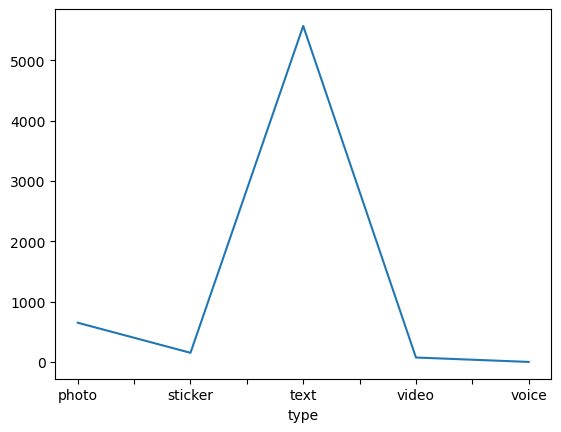

In [366]:
df_types.plot()

3) What's the total duration of the videos, I've sent?

In [367]:
(df.loc[df["type"] == "video"])["duration"].sum()

2251.0

4) How often the word "шо" appears?

In [368]:
get_word = df_copy.copy()
#splitting text by words
get_word['splitted'] = get_word['message'].apply(lambda n: str(n).split(' '))
get_word.head(3)
#getting the list of splitted words
w_list = list(itertools.chain(*get_word['splitted']))
#creating the empty list to pop in words
w_list2 = []
#adding in the words
for word in w_list:
    w_list2.append(word.lower())

print(f'"ШО"  --> {w_list2.count("шо")}' )

"ШО"  --> 70


5) What's the max amount of chats I have with somebody?

In [369]:
max_incommon = df_meta.groupby(['users'])['dialog_id'].count().sort_values(ascending = False)[1]
max_incommon


14

6) What's the number of texts that I've sent?

In [370]:
mytexts_num = df.loc[df["from_id"] == telegram_id].count().sort_values(ascending = False)[1]
mytexts_num

314

7) What's the top dialogs where I've sent my texts to?

In [371]:
mytextsMAX_df = df.loc[df["from_id"] == telegram_id]
mytextsMAX_df

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
826,334014,2022-05-14 23:14:48+00:00,PeerUser(user_id=310776127),1463795374,NaN,"так, привітала його)",text,NaN,1463795374
830,334009,2022-05-14 22:42:39+00:00,PeerUser(user_id=310776127),1463795374,NaN,🌸,sticker,NaN,1463795374
832,322138,2022-02-04 13:22:31+00:00,PeerUser(user_id=310776127),1463795374,NaN,😊,sticker,NaN,1463795374
834,318516,2022-01-01 09:52:57+00:00,PeerUser(user_id=310776127),1463795374,NaN,дякууую!!! навзаєм☺️🎄❣️,text,NaN,1463795374
837,318125,2021-12-29 08:36:40+00:00,PeerUser(user_id=310776127),1463795374,NaN,клааас))),text,NaN,1463795374
...,...,...,...,...,...,...,...,...,...
6441,309446,2021-10-21 20:07:28+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😰,sticker,NaN,-723344273
6443,309444,2021-10-21 20:07:14+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,👌,sticker,NaN,-723344273
6446,309441,2021-10-21 20:07:01+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😻,sticker,NaN,-723344273
6447,309440,2021-10-21 20:06:51+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😑,sticker,NaN,-723344273


8) What's the average amount of words per each chat?

In [372]:
alltexts_df['avg words'] = alltexts_df['message'].apply(lambda n: len(str(n).split(' ')))
alltexts_df

,id,date,from_id,to_id,fwd_from,message,type_x,duration,dialog_id,name,type_y,users,avg words
0,334014,2022-05-14 23:14:48+00:00,PeerUser(user_id=310776127),1463795374,NaN,"так, привітала його)",text,NaN,1463795374,Тетяна Янченкова,Private dialog,"{'user_id': 1463795374, 'first_name': 'Тетяна ...",3
1,334009,2022-05-14 22:42:39+00:00,PeerUser(user_id=310776127),1463795374,NaN,🌸,sticker,NaN,1463795374,Тетяна Янченкова,Private dialog,"{'user_id': 1463795374, 'first_name': 'Тетяна ...",1
2,322138,2022-02-04 13:22:31+00:00,PeerUser(user_id=310776127),1463795374,NaN,😊,sticker,NaN,1463795374,Тетяна Янченкова,Private dialog,"{'user_id': 1463795374, 'first_name': 'Тетяна ...",1
3,318516,2022-01-01 09:52:57+00:00,PeerUser(user_id=310776127),1463795374,NaN,дякууую!!! навзаєм☺️🎄❣️,text,NaN,1463795374,Тетяна Янченкова,Private dialog,"{'user_id': 1463795374, 'first_name': 'Тетяна ...",2
4,318125,2021-12-29 08:36:40+00:00,PeerUser(user_id=310776127),1463795374,NaN,клааас))),text,NaN,1463795374,Тетяна Янченкова,Private dialog,"{'user_id': 1463795374, 'first_name': 'Тетяна ...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,309446,2021-10-21 20:07:28+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😰,sticker,NaN,-723344273,царствие невъебесное,Group,"{'user_id': 380709941, 'first_name': 'Сергій',...",1
1649,309444,2021-10-21 20:07:14+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,👌,sticker,NaN,-723344273,царствие невъебесное,Group,"{'user_id': 380709941, 'first_name': 'Сергій',...",1
1653,309441,2021-10-21 20:07:01+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😻,sticker,NaN,-723344273,царствие невъебесное,Group,"{'user_id': 380709941, 'first_name': 'Сергій',...",1
1657,309440,2021-10-21 20:06:51+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😑,sticker,NaN,-723344273,царствие невъебесное,Group,"{'user_id': 380709941, 'first_name': 'Сергій',...",1


In [373]:
my_texts_df['avg words'] = my_texts_df['message'].apply(lambda n: len(str(n).split(' ')))
my_texts_df

/var/folders/pf/98bzp38x58b1l5xyhzvg6scr0000gn/T/ipykernel_16863/1217878375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_texts_df['avg words'] = my_texts_df['message'].apply(lambda n: len(str(n).split(' ')))


,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id,avg words
826,334014,2022-05-14 23:14:48+00:00,PeerUser(user_id=310776127),1463795374,NaN,"так, привітала його)",text,NaN,1463795374,3
830,334009,2022-05-14 22:42:39+00:00,PeerUser(user_id=310776127),1463795374,NaN,🌸,sticker,NaN,1463795374,1
832,322138,2022-02-04 13:22:31+00:00,PeerUser(user_id=310776127),1463795374,NaN,😊,sticker,NaN,1463795374,1
834,318516,2022-01-01 09:52:57+00:00,PeerUser(user_id=310776127),1463795374,NaN,дякууую!!! навзаєм☺️🎄❣️,text,NaN,1463795374,2
837,318125,2021-12-29 08:36:40+00:00,PeerUser(user_id=310776127),1463795374,NaN,клааас))),text,NaN,1463795374,1
...,...,...,...,...,...,...,...,...,...,...
6441,309446,2021-10-21 20:07:28+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😰,sticker,NaN,-723344273,1
6443,309444,2021-10-21 20:07:14+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,👌,sticker,NaN,-723344273,1
6446,309441,2021-10-21 20:07:01+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😻,sticker,NaN,-723344273,1
6447,309440,2021-10-21 20:06:51+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😑,sticker,NaN,-723344273,1


9) What is the mean value of words in all dialogs?

In [374]:
mean_wa = alltexts_df['avg words'].mean()
mean_wa

4.1309904153354635

10) What is the mean value of words in incoming texts?

In [375]:
mean_wi = df_copy['avg words'].mean()
mean_wi

10.413606074693941

11) What is the average amount of words in my texts?

In [376]:
mytexts_df['avg words'] = mytexts_df['message'].apply(lambda n: len(str(n).split(' ')))
mean_w_sent = mytexts_df['avg words'].mean()
mean_w_sent


/var/folders/pf/98bzp38x58b1l5xyhzvg6scr0000gn/T/ipykernel_16863/2012782179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mytexts_df['avg words'] = mytexts_df['message'].apply(lambda n: len(str(n).split(' ')))


4.1210191082802545

12) Where I texted more: to the private or group chats?

Text(0, 0.5, 'number of texts sent')

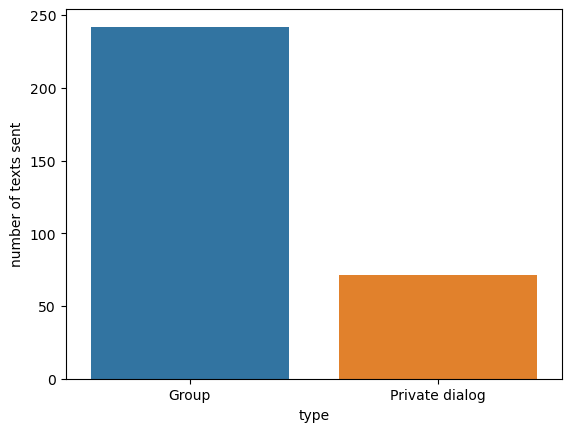

In [377]:
chat_info = alltexts_df.groupby(by = 'type_y').count()
sns.barplot(x = chat_info.index, y = 'id', data = chat_info)
plt.xlabel("type")
plt.ylabel("number of texts sent")

13) What are my top 10 emojis?

In [378]:

#sticker_df = df[df['type'] == 'sticker']
#st_df_grouped = sticker_df.groupby(by='message').count().reset_index().sort_values(by='id', ascending=False)


In [379]:
top = st_df_grouped["message"]
top.head(10)

81    🤡
45    😐
41    😊
7     ❗
80    🤔
27    💩
21    👍
20    👌
57    😫
35    🖕
Name: message, dtype: object

14) Average amount of words in chats vs average amount of words in texts?

In [380]:
df = alltexts_df.drop((["date",'dialog_id', 'name', 'users', 'duration', 'message', 'to_id', 'fwd_from', 'from_id', 'type_y', 'type_x']), axis=1)
df.mean()

id           223447.268371
avg words         4.130990
dtype: float64

In [381]:
myAVG_df = mytexts_df.drop(([ "date",'dialog_id', 'duration', 'message', 'to_id','type', 'fwd_from', 'from_id']), axis=1)
myAVG = myAVG_df.rename(columns={"avg words": "avg words me"})
myAVG

,id,avg words me
826,334014,3
830,334009,1
832,322138,1
834,318516,2
837,318125,1
...,...,...
6441,309446,1
6443,309444,1
6446,309441,1
6447,309440,1


In [382]:
allAVG_df = alltexts_df.drop((["date",'dialog_id', 'name', 'users', 'duration', 'message', 'to_id', 'fwd_from', 'from_id', 'type_y', 'type_x']), axis=1)
allAVG = allAVG_df.rename(columns={"avg words": "avg words all"})
allAVG

,id,avg words all
0,334014,3
1,334009,1
2,322138,1
3,318516,2
4,318125,1
...,...,...
1645,309446,1
1649,309444,1
1653,309441,1
1657,309440,1


In [383]:
result = pd.concat([myAVG, allAVG], axis=1, join='inner')
res = result.drop(['id', 'id'], axis = 1)
display(res)

,avg words me,avg words all
1173,4,11
1193,1,1
1273,1,2
1285,9,1
1301,1,4
1309,6,6
1329,1,3
1353,7,1
1409,1,1
1541,12,1


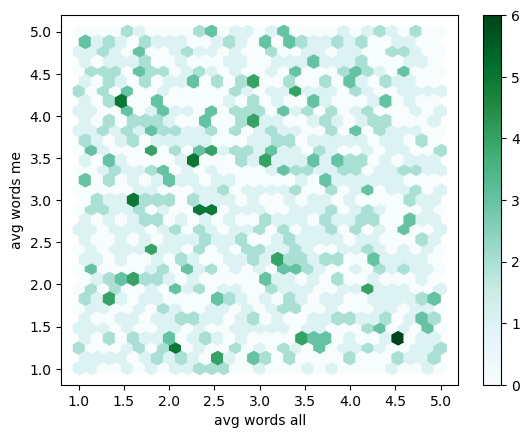

In [384]:

n = 1000
res = pd.DataFrame({'avg words me': np.random.uniform(1, 5, size = n),
                    'avg words all': np.random.uniform(1, 5, size = n)})

res.plot.hexbin(x="avg words all", y="avg words me", gridsize=30);

15) Is there a correlation between number of users in the group and average texts sent?

In [385]:
#big_dep['avg words'] = alltexts_df['message'].apply(lambda n: len(str(n).split(' ')))
#big_dep
#bd
result6 = pd.concat([bd, alltexts_df], axis=1)
result7 = result6.dropna(subset=['name'])
result7.columns.values[1] = "num of people"
result8 = result7.drop((['name', 'users', 'duration','id','dialog_id', 'message', 'to_id', 'fwd_from', 'from_id', 'type_y', 'type_x']), axis=1)
display(result8)

,num of people,date,avg words
161,815.0,2019-03-21 16:03:41+00:00,1.0
3,291.0,2022-01-01 09:52:57+00:00,2.0
33,173.0,2019-04-23 12:07:05+00:00,5.0


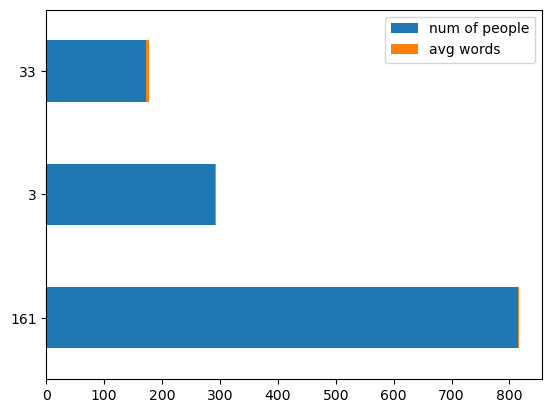

In [386]:
result8.plot.barh(stacked=True);

16) How close is the global trend of types to mine?

In [387]:
alltypes = alltextS.groupby(["type"])["type"].count()
alltypes

type
photo       652
sticker     154
text       5568
video        76
voice         3
Name: type, dtype: int64

<AxesSubplot:xlabel='type'>

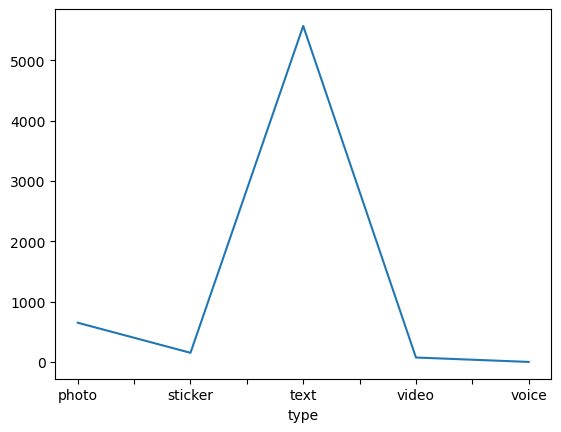

In [388]:
alltypes.plot()

In [389]:
mytypes = mYtexts.groupby(["type"])["type"].count()
mytypes

type
photo       43
sticker     57
text       206
video        8
Name: type, dtype: int64

<AxesSubplot:xlabel='type'>

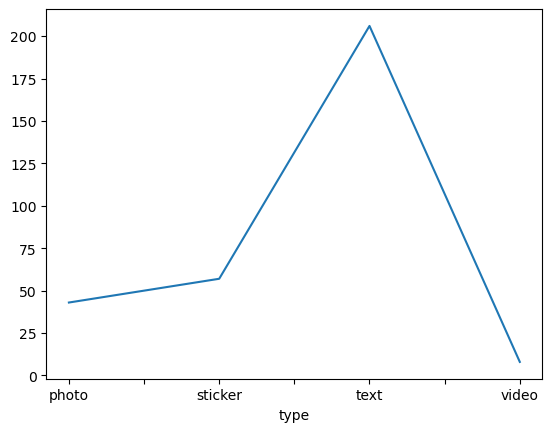

In [390]:
mytypes.plot()

In [391]:
result3 = pd.concat([mytypes, alltypes], axis=1, join='inner')
result3.columns.values[0] = "type my"
result3.columns.values[1] = "type all"
display(result3)

,type my,type all
type,,
photo,43,652
sticker,57,154
text,206,5568
video,8,76


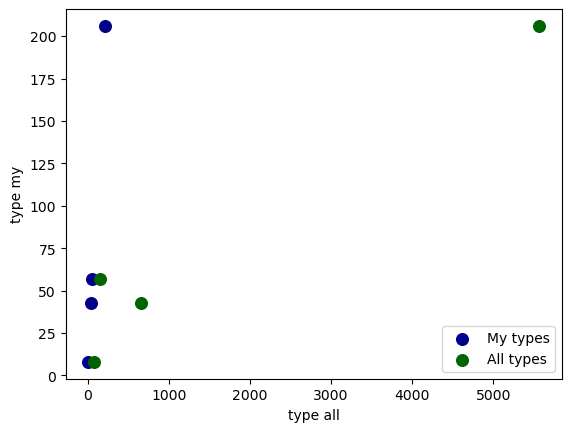

In [392]:
ax = result3.plot.scatter(x="type my", y=0, color="DarkBlue", label="My types", s=70)

result3.plot.scatter(x="type all", y=0, color="DarkGreen", label="All types",s=70, ax=ax);

17) How many people do I know through all of the chats?

In [393]:
df_meta[["dialog_id","users"]].groupby(by="users").count().shape[0]

9995

18) What are the groups with the biggest amount of people?

In [394]:
bd = df_meta[["dialog_id","name"]].groupby(by="name", as_index=False).count().sort_values(by="dialog_id", ascending=False).head(10)
bd

,name,dialog_id
130,Київ | Українська Волонтерська Служба,6254
163,Філіал КМЦ,2544
161,ФІ,815
3,AC to stop russia,291
33,FLEX Alumni Central Ukraine Chat,173
162,ФІ 22 - 23,173
160,ФLEX‘18 олды,81
114,Багатозадачне та паралельне програмування,81
42,Kyiv'19 NSC delegates support,73
179,🤮,53


In [395]:
mytexts_df

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id,avg words
826,334014,2022-05-14 23:14:48+00:00,PeerUser(user_id=310776127),1463795374,NaN,"так, привітала його)",text,NaN,1463795374,3
830,334009,2022-05-14 22:42:39+00:00,PeerUser(user_id=310776127),1463795374,NaN,🌸,sticker,NaN,1463795374,1
832,322138,2022-02-04 13:22:31+00:00,PeerUser(user_id=310776127),1463795374,NaN,😊,sticker,NaN,1463795374,1
834,318516,2022-01-01 09:52:57+00:00,PeerUser(user_id=310776127),1463795374,NaN,дякууую!!! навзаєм☺️🎄❣️,text,NaN,1463795374,2
837,318125,2021-12-29 08:36:40+00:00,PeerUser(user_id=310776127),1463795374,NaN,клааас))),text,NaN,1463795374,1
...,...,...,...,...,...,...,...,...,...,...
6441,309446,2021-10-21 20:07:28+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😰,sticker,NaN,-723344273,1
6443,309444,2021-10-21 20:07:14+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,👌,sticker,NaN,-723344273,1
6446,309441,2021-10-21 20:07:01+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😻,sticker,NaN,-723344273,1
6447,309440,2021-10-21 20:06:51+00:00,PeerUser(user_id=310776127),PeerChat(chat_id=723344273),NaN,😑,sticker,NaN,-723344273,1
